# <center> <h1 style="font-family:timesnewroman; color: DarkBlue">Data 608</h1> </center> 
## <center> <h3 style="font-family:timesnewroman; color: DarkBlue"> Story 3</h3> </center> 
### <center> <h3 style="font-family:timesnewroman; color: DarkBlue"> Author: Frederick Jones </h3> </center> 
### Import the required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Download the dataset using an api

In [2]:
df = pd.read_csv("https://data.cdc.gov/resource/489q-934x.csv")
df.head(3)

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_age_1_4,rate_age_5_14,...,rate_south_dakota,rate_tennessee,rate_texas,rate_utah,rate_virginia,rate_vermont,rate_washington,rate_wisconsin,rate_west_virginia,rate_wyoming
0,2021 Q1,12 months ending with quarter,All causes,Age-adjusted,"Deaths per 100,000",866.3,716.3,1040.4,NaN,NaN,...,882.7,1056.8,922.0,771.2,824.8,737.9,714.8,825.8,1096.9,854.0
1,2021 Q1,12 months ending with quarter,Alzheimer disease,Age-adjusted,"Deaths per 100,000",32.1,36.8,24.8,NaN,NaN,...,37.4,42.8,44.9,41.1,28.3,34.3,42.0,31.7,35.2,32.1
2,2021 Q1,12 months ending with quarter,COVID-19,Age-adjusted,"Deaths per 100,000",120.7,94.0,153.9,NaN,NaN,...,145.8,122.5,162.3,68.7,92.0,21.5,46.5,86.1,94.2,84.0


## Filter the data for Firearm-related injury

In [3]:
df_firearm_death = df[(df["cause_of_death"]=="Firearm-related injury") & (df["rate_type"]=="Age-adjusted") & (df["time_period"]=="12 months ending with quarter")]
df_firearm_death.head()

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_age_1_4,rate_age_5_14,...,rate_south_dakota,rate_tennessee,rate_texas,rate_utah,rate_virginia,rate_vermont,rate_washington,rate_wisconsin,rate_west_virginia,rate_wyoming
9,2021 Q1,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.0,4.0,24.4,NaN,NaN,...,15.5,22.3,14.5,13.9,13.2,12.0,10.7,12.3,17.4,25.0
53,2021 Q2,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.4,4.1,24.9,NaN,NaN,...,15.5,22.7,15.1,14.1,13.7,11.2,10.5,12.9,17.5,24.6
97,2021 Q3,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.6,4.1,25.2,NaN,NaN,...,13.8,23.0,15.3,14.7,13.6,11.9,10.9,13.2,17.7,23.7
141,2021 Q4,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.6,4.2,25.3,NaN,NaN,...,14.3,22.8,15.6,13.9,14.3,11.9,11.2,13.5,17.3,26.1
185,2022 Q1,12 months ending with quarter,Firearm-related injury,Age-adjusted,"Deaths per 100,000",14.7,4.2,25.5,NaN,NaN,...,14.8,22.5,15.9,13.2,14.9,11.8,11.8,14.5,16.8,25.8


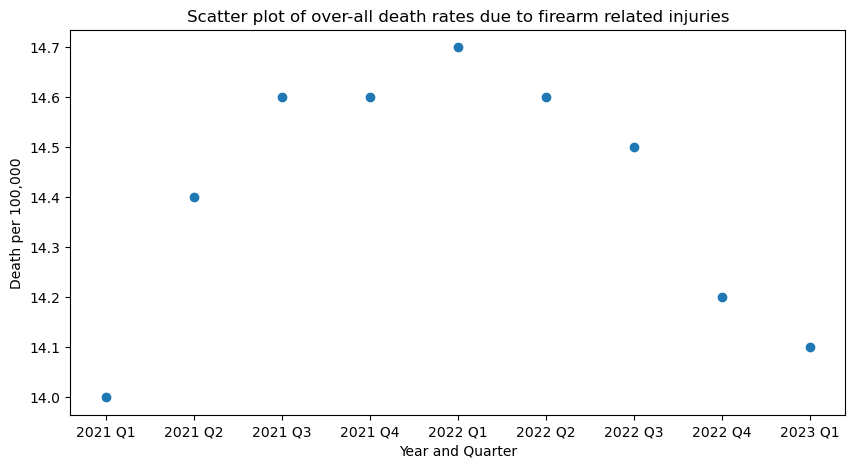

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(df_firearm_death.year_and_quarter, df_firearm_death.rate_overall)
plt.title("Scatter plot of over-all death rates due to firearm related injuries")
plt.xlabel("Year and Quarter")
plt.ylabel("Death per 100,000")
plt.show()

## Barplot of death rates due to fire arm injuries among males and females

In [5]:
df_death_f = df_firearm_death[['year_and_quarter','rate_sex_female']]
df_death_f["Sex"] =len(df_death_f['rate_sex_female'])*['female']
df_death_f.columns = ['year_and_quarter', 'death_rate', 'sex']
df_death_m = df_firearm_death[['year_and_quarter','rate_sex_male']]
df_death_m["Sex"] =len(df_death_m['rate_sex_male'])*['male']
df_death_m.columns = ['year_and_quarter', 'death_rate', 'sex']
df_death_mf = pd.concat([df_death_m, df_death_f], axis=0)
df_death_mf.index= np.arange(0, len(df_death_mf.sex))

C:\Users\mnasm\AppData\Local\Temp\ipykernel_18728\3775156849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death_f["Sex"] =len(df_death_f['rate_sex_female'])*['female']
C:\Users\mnasm\AppData\Local\Temp\ipykernel_18728\3775156849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death_m["Sex"] =len(df_death_m['rate_sex_male'])*['male']


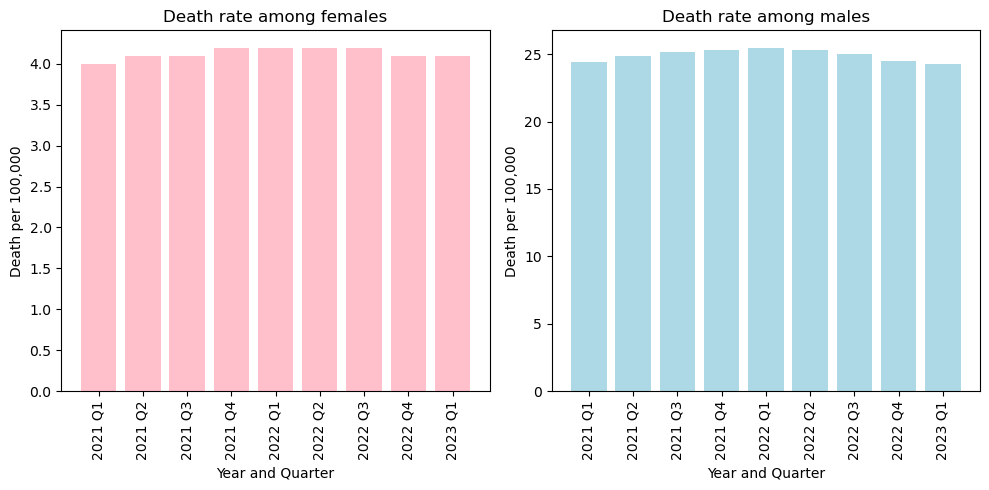

In [6]:
plt.figure(figsize=(10, 5))

# Plotting the bar plot of death rate of females from firearm injuries
plt.subplot(1, 2, 1)  
plt.bar(df_firearm_death['year_and_quarter'], df_firearm_death['rate_sex_female'], color='pink')
plt.title('Death rate among females')
plt.xlabel('Year and Quarter')
plt.ylabel('Death per 100,000')
plt.xticks(rotation=90)

# Plotting the bar plot of death rate of males from fire arm injuries
plt.subplot(1, 2, 2) 
plt.bar(df_firearm_death['year_and_quarter'],df_firearm_death['rate_sex_male'], color='lightblue')
plt.title('Death rate among males')
plt.xlabel('Year and Quarter')
plt.ylabel('Death per 100,000')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

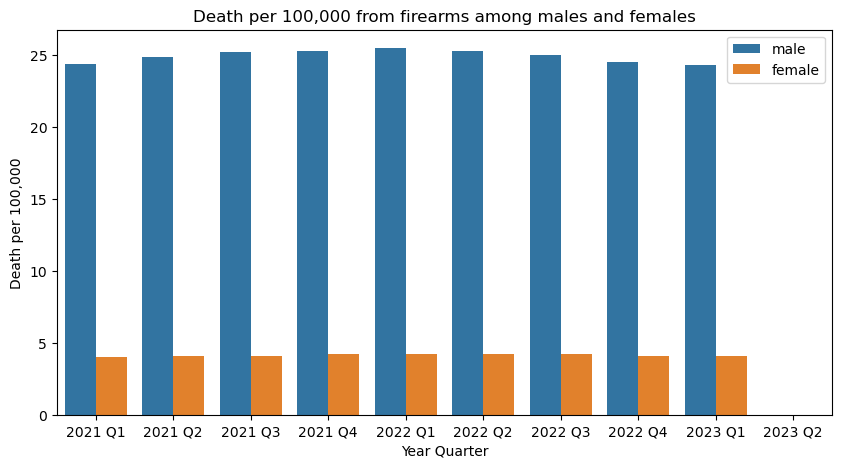

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_death_mf, x='year_and_quarter', y='death_rate', hue='sex', errorbar=None,  estimator='mean')
plt.xlabel("Year Quarter")
plt.ylabel('Death per 100,000')
plt.title("Death per 100,000 from firearms among males and females")
plt.legend(loc = 'upper right')
plt.show()

In [8]:
df2 = pd.read_table("C:/Users/mnasm/Downloads/Compressed_Mortality_1968-1978.txt")
df2 = df2.iloc[0:44, :]
df2=df2[df2["Notes"]=='Total']
df2 = df2.drop(["Notes","Year Code", "Cause of death", "Cause of death Code"], axis=1)
df2= df2.drop(['Deaths', "Population"], axis=1)
df2.columns=["Year", "Death per 100000"]

In [9]:
df3 = pd.read_table("C:/Users/mnasm/Downloads/Compressed_Mortality_1979-1998.txt")
df3=df3.iloc[0:313]
df3 = df3[df3["Notes"]!="Total"]
df3= df3.drop(["Notes", "Cause of death", "Cause of death Code", "Year Code"], axis=1)
year = np.arange(1979.0, 1999.0)
death_rate = []
for y in year:
    pop=df3[df3["Year"]==y]["Population"].mean()
    deaths = df3[df3["Year"]==y]["Deaths"].sum()
    death_rate.append(deaths/pop*100000)
data = {
    "Year": year,
    "Death per 100000":death_rate
}
df3 = pd.DataFrame(data)

In [10]:
df4 = pd.read_table("C:/Users/mnasm/Downloads/Compressed_Mortality_1999-2016.txt")
df4 = df4.iloc[0:162, :]
df4 = df4.drop(["Notes", "Year Code", "Cause of death", "Cause of death Code","Crude Rate", "Deaths", "Population"], axis=1)
df4 = df4.groupby("Year").sum()
df4['Year']=df4.index
df4.index = np.arange(0,len(df4))
df4.columns = ["Death per 100000", 'Year']

In [11]:
df = pd.concat([df2, df3,df4], axis=0)
df.index = np.arange(0, len(df))

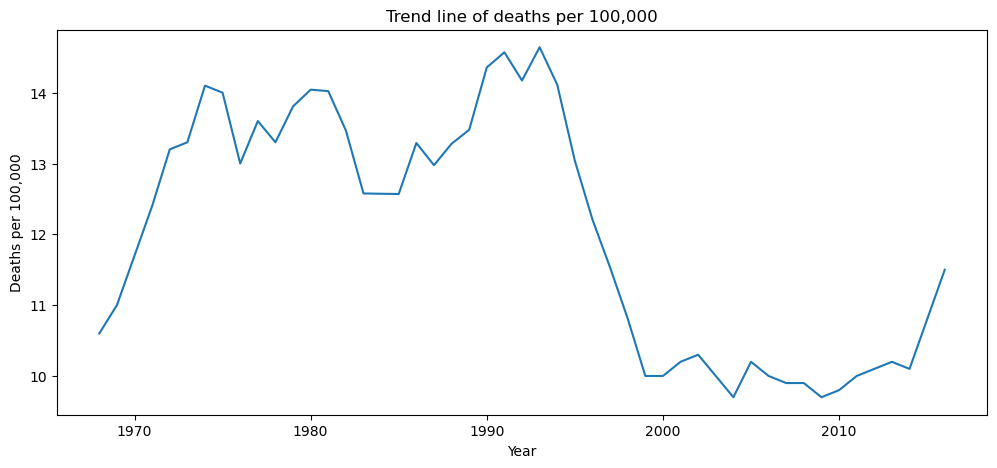

In [12]:
plt.figure(figsize=[12, 5])
plt.plot(df.Year, df["Death per 100000"])
plt.title("Trend line of deaths per 100,000")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000")
plt.show()

It can be seen that the deaths per 100,000 decreases as the law becomes stricter and then after 2010 the deaths per 100,000 seems to be increasing after some relaxation in firearm deals. 

In [13]:
laws = ["GCA","FOPA",  "UFA", "BHVPA", "PLCAA"]
years = [1968, 1986, 1988, 1993, 2005]
likert_data ={
    "Year":years,
    "laws":laws    
}
likert_df = pd.DataFrame(likert_data)
likert_df

,Year,laws
0,1968,GCA
1,1986,FOPA
2,1988,UFA
3,1993,BHVPA
4,2005,PLCAA


Here: 
GCA : Gun Control Act of 1968<br>
FOPA: Firearm Owners Protection Act 1986  <br>
UFA : Undetectable Firearms Act 1988  <br>
BHVPA: Brady Handgun Violence Prevention Act 1993  <br>
PLCAA: Protection of Lawful Commerce in Arms Act 2005  <br>
FOPA was a little relaxed than the GCA similarly PLCAA was milder than BHVPA. If we arrange these laws from most relaxed to strictest, we have 
FOPA<GCA<UFA<PLCAA<BHVPA  <br>
Based on it, we develop a likert scale as follows:

In [14]:
Laws = []
lik_scale=[]
for i in range(len(df)):
    if (df.Year[i] <= 1986):
        Laws.append(laws[0])
        lik_scale.append(2)
    elif (df.Year[i] > 1986) & (df.Year[i] <= 1988):
        Laws.append(laws[1])
        lik_scale.append(1)
    elif (df.Year[i] > 1988) & (df.Year[i] <= 1993):
        Laws.append(laws[2])
        lik_scale.append(3)
    elif (df.Year[i] > 1993) & (df.Year[i] <= 2005):
        Laws.append(laws[3])
        lik_scale.append(5)
    elif (df.Year[i] > 2005):
        Laws.append(laws[4])
        lik_scale.append(4) 



In [15]:
df["Effective_Law"]= Laws
df["Likert_scale"]=lik_scale
df["Death per 100000"]=round(df["Death per 100000"], 1)

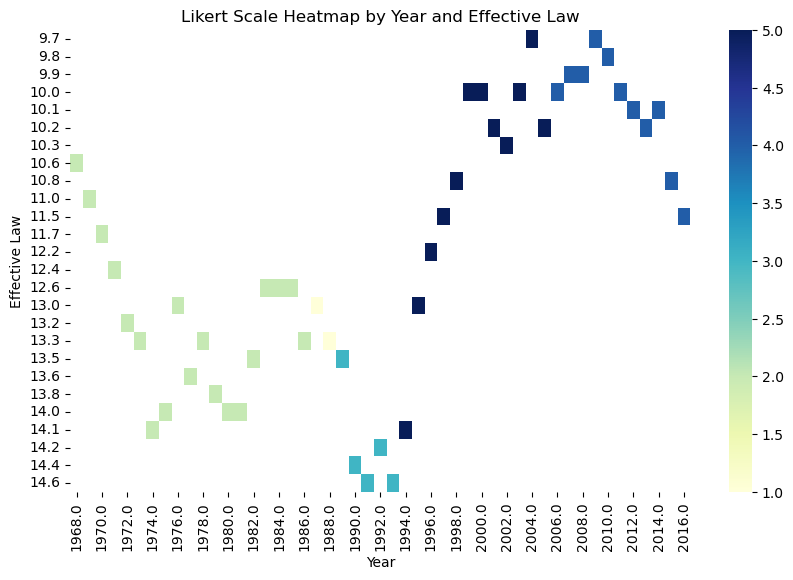

In [16]:
# Pivot the DataFrame for heatmap
heatmap_data = df.pivot_table("Likert_scale", "Death per 100000","Year")

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title('Likert Scale Heatmap by Year and Effective Law')
plt.xlabel('Year')
plt.ylabel('Effective Law')
plt.show()

It can be seen: as the law becomes stricter the deaths per 100,000 comes down. It should be noted that the deaths per 100,000 also depend on the population as the population grows, the rate is also expected to grow.According to the left scale, as we go up the rate of deaths per 100,000 comes down. Right scale shows the as the color becomes darker, the law becomes stricter.  